# Importing Modules

In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder , LabelEncoder , MinMaxScaler 
from sklearn.model_selection import train_test_split , GridSearchCV , cross_validate 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix , f1_score , roc_curve , auc 
import warnings 
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter('ignore' , FitFailedWarning )

# Importing Dataset

In [43]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [44]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Check Missing Values

In [45]:
df.isna().any().any()   # 1st any for column , 2nd any for row

False

# Encoding Categorical Values

In [46]:
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']

encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

# Seperating into X and y

In [47]:
y = df['Attrition']

# axis =  1 for column  0 for row 
X = df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'] , axis = 1 ) 

# Spliting into Train and Test Sets

In [48]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 1 )

### Sample Row

In [49]:
X_train.iloc[0:2]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
99,44,0,489,1,23,3,3,2,1,67,...,3,3,1,17,3,4,3,2,1,2
785,40,2,1492,1,20,4,5,1,1,61,...,4,4,1,14,6,3,11,10,11,1


# Feature Scaling

Standardization

In [50]:
standard_scaler = StandardScaler()

X_train_standardized =standard_scaler.fit_transform(X_train)
X_test_standardized =standard_scaler.fit_transform(X_test)
X_standardized =standard_scaler.fit_transform(X)

Normalization

In [83]:
min_max_scaler = MinMaxScaler()

X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.fit_transform(X_test)
X_normalized = min_max_scaler.fit_transform(X)

# Hyper-parameter Tuning Using Grid Search CV

In [55]:
def tune_hyperparameters(model , X , y ):
    param_grid = { "C": np.logspace(-3 , 3 , 7 ) , 
                  "penalty": ["l1" , "l2" ],
                  "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                 }
    grid_search = GridSearchCV(model , param_grid = param_grid )
    grid_search.fit(X , y )
    print("Best Params : " , grid_search.best_params_ ) 
    

### With Standardization

In [59]:
tune_hyperparameters(LogisticRegression(max_iter = 100000) , X_train_standardized , y_train )

Best Params :  {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.84450864        nan 0.84450864 0.84450864
 0.84450864 0.8726924  0.84450864 0.84450864        nan        nan
 0.84450864        nan 0.84450864 0.85131423 0.85131423 0.86686242
 0.85131423 0.85131423        nan        nan 0.8649112         nan
 0.8649112  0.86685295 0.86685295 0.86394033 0.86685295 0.86685295
        nan        nan 0.86394033        nan 0.86394033 0.86685768
 0.86685768 0.86685768 0.86685768 0.86685768        nan        nan
 0.86686242        nan 0.86686242 0.86686242 0.86686242 0.86686242
 0.86686242 0.86686242        nan        nan 0.86686242        nan
 0.86686242 0.86686242 0.86686242 0.86686242 0.86686242 0.86686242
        nan        nan 0.86686242        nan 0.86686242 0.86686242
 0.86686242 0.86686242 0.86686242 0.86686242]
  warnings.warn(


### With Normalization

In [60]:
tune_hyperparameters(LogisticRegression(max_iter=100000),X_train_normalized,y_train)

Best Params :  {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.84450864        nan 0.84450864 0.84450864
 0.84450864 0.84450864 0.84450864 0.84450864        nan        nan
 0.84450864        nan 0.84450864 0.84450864 0.84450864 0.84450864
 0.84450864 0.84450864        nan        nan 0.84450864        nan
 0.84450864 0.85228984 0.85228984 0.85228984 0.85228984 0.85228984
        nan        nan 0.86199384        nan 0.86296472 0.86588207
 0.86588207 0.86685295 0.86588207 0.86588207        nan        nan
 0.86588207        nan 0.86685768 0.86491594 0.86491594 0.86491594
 0.86491594 0.86491594        nan        nan 0.86686242        nan
 0.86686242 0.86686242 0.86686242 0.86686242 0.86686242 0.86686242
        nan        nan 0.86686242        nan 0.86686242 0.86686242
 0.86686242 0.86686242 0.86686242 0.86686242]
  warnings.warn(


# Performing Logistic Regression

In [66]:
def train_predict_evaluate(model , X_train , y_train , X_test ):
    model.fit(X_train , y_train)
    y_pred = model.predict( X_test )
    
    print("Accuracy: ",accuracy_score(y_test,y_pred))
    print("Precision: ",precision_score(y_test,y_pred))
    print("Recall: ",recall_score(y_test,y_pred))
    print("F1 Score: ",f1_score(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    
    fpr, tpr , thresholds = roc_curve(y_test , y_pred )
    
    plt.plot(fpr , tpr , color = 'green' , label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
    plt.plot([0,1] , [0 , 1 ] , color = 'orange' , linestyle = '--' )
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

### Without scaling

Accuracy:  0.8526077097505669
Precision:  0.7
Recall:  0.2727272727272727
F1 Score:  0.3925233644859813
Confusion Matrix:
 [[355   9]
 [ 56  21]]


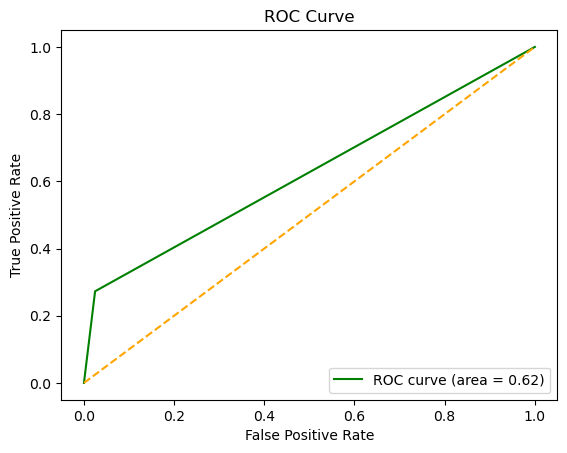

In [67]:
train_predict_evaluate(LogisticRegression(max_iter=100000),X_train,y_train,X_test)

### With Standardization

Accuracy:  0.8639455782312925
Precision:  0.84
Recall:  0.2727272727272727
F1 Score:  0.41176470588235287
Confusion Matrix:
 [[360   4]
 [ 56  21]]


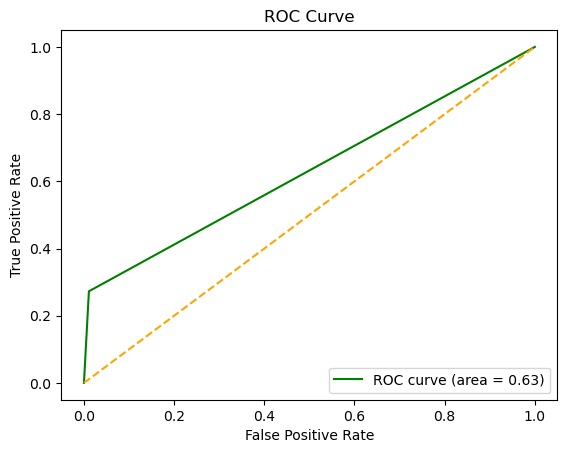

In [68]:
train_predict_evaluate(LogisticRegression(max_iter=100000,C=0.001,penalty='l2',solver='liblinear'),X_train_standardized,y_train,X_test_standardized)

### With Normalization

Accuracy:  0.8639455782312925
Precision:  0.7741935483870968
Recall:  0.3116883116883117
F1 Score:  0.4444444444444445
Confusion Matrix:
 [[357   7]
 [ 53  24]]


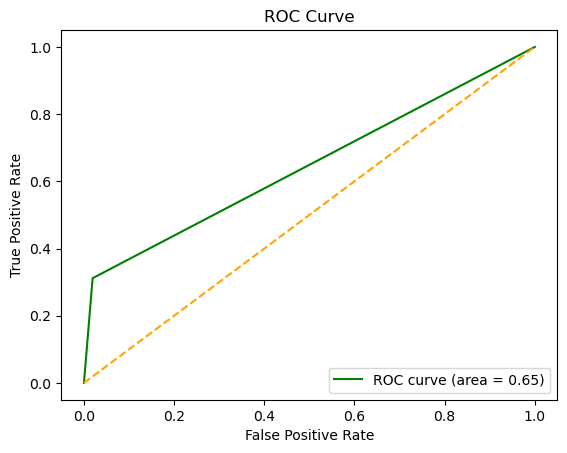

In [69]:
train_predict_evaluate(LogisticRegression(max_iter=100000,C=100,penalty='l1',solver='liblinear'),X_train_normalized,y_train,X_test_normalized)

# K-Fold Cross Validation

In [77]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [78]:
metrics = []

### Without Scaling

In [79]:
metrics.append(cross_validation(LogisticRegression(max_iter=100000),X,y))

Accuracy:  0.8653061224489795
Precision:  0.6831406066700184
Recall:  0.3120567375886525
F1 Score:  0.42518866139232775


### With Standardization

In [80]:
metrics.append(cross_validation(LogisticRegression(max_iter=100000,C=0.001,penalty='l2',solver='liblinear'),X_standardized,y))

Accuracy:  0.8748299319727891
Precision:  0.7529716139879479
Recall:  0.3459219858156028
F1 Score:  0.4717723744376053


### With Normalization

In [84]:
metrics.append(cross_validation(LogisticRegression(max_iter=100000,C=100,penalty='l1',solver='liblinear'),X_normalized,y))

Accuracy:  0.8653061224489796
Precision:  0.668111111111111
Recall:  0.3375886524822695
F1 Score:  0.4458570434646066


# Performance and Comparison Plots

In [85]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()

,Accuracy,Precision,Recall,F1 Score
Without Scaling,0.865306,0.683141,0.312057,0.425189
With Standardization,0.874830,0.752972,0.345922,0.471772
With Normalization,0.865306,0.668111,0.337589,0.445857


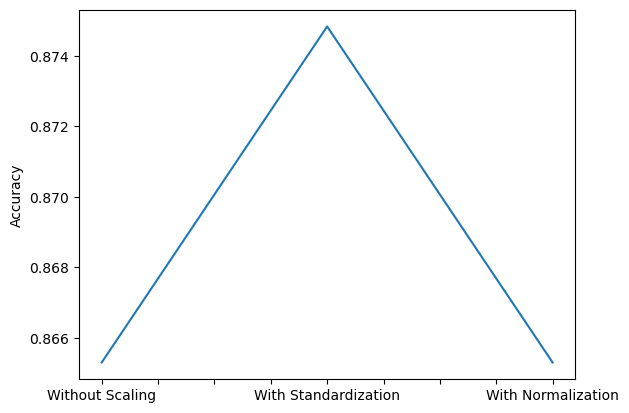

In [86]:
mdf['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()

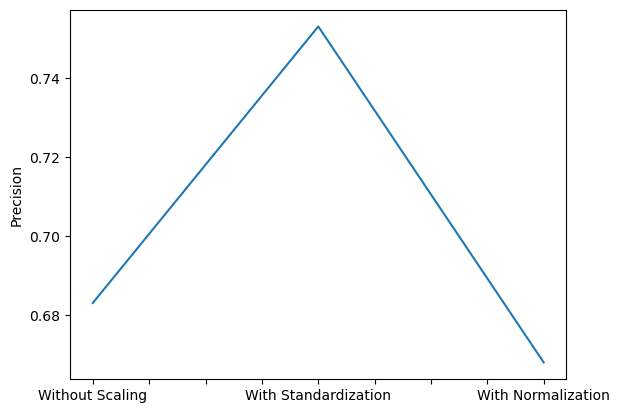

In [87]:
mdf['Precision'].plot()
plt.ylabel("Precision")
plt.show()

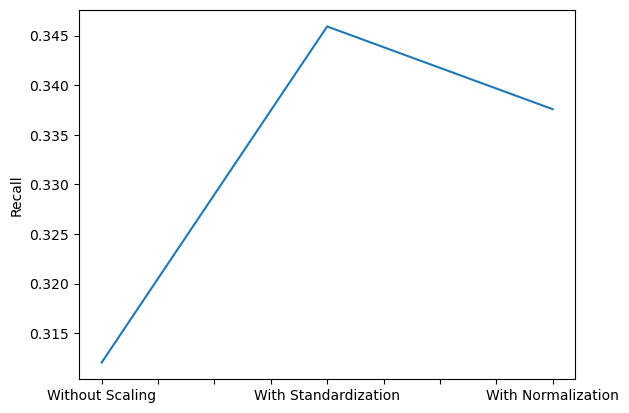

In [88]:
mdf['Recall'].plot()
plt.ylabel("Recall")
plt.show()

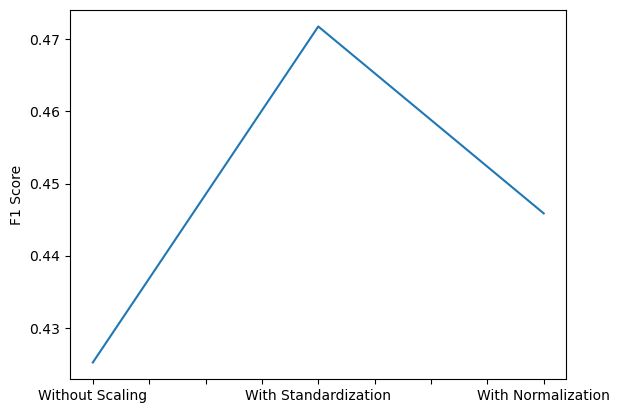

In [90]:
mdf['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()